# Loading Data file for all IPL Seasons into a Dataframe to explore the data of Individual players and teams ball by ball 

In [3]:
""" Importing all the required libraries """

import pandas as pd

# pd.set_option("display.max_columns", 45)

In [4]:
all_seasons_df = pd.read_csv("all_season_details_updated.csv")

/var/folders/rv/7081c9ws011__m65sb36mhs00000gq/T/ipykernel_54715/3979914783.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  all_seasons_df = pd.read_csv("all_season_details_updated.csv")


# Data Cleaning , Checking Null , NaN and Data types in the DataFrame


# Checking NaN values in 'season' and filling a values for it

# Checking Datatype of the columns in the DataFrame

In [5]:
all_seasons_df.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt'],
      dtype='object')

In [6]:
all_seasons_df.dtypes #.info(verbose=True)

comment_id             int64
season                 int64
match_id               int64
match_name            object
home_team             object
away_team             object
current_innings       object
innings_id             int64
over                   int64
ball                   int64
runs                   int64
shortText             object
isBoundary              bool
isWide                  bool
isNoball                bool
batsman1_id            int64
batsman1_name         object
batsman1_runs          int64
batsman1_balls         int64
bowler1_id             int64
bowler1_name          object
bowler1_overs        float64
bowler1_maidens        int64
bowler1_runs           int64
bowler1_wkts           int64
batsman2_id           object
batsman2_name         object
batsman2_runs          int64
batsman2_balls         int64
bowler2_id           float64
bowler2_name          object
bowler2_overs        float64
bowler2_maidens      float64
bowler2_runs         float64
bowler2_wkts  

In [7]:
all_seasons_df[all_seasons_df["batsman2_id"]=='undefined']

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt
105995,210,2017,1082648,SRH v KKR,SRH,KKR,KKR,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
106003,21030,2017,1082648,SRH v KKR,SRH,KKR,KKR,2,2,2,...,0.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,False


In [8]:
def batsman(batsmans2):
    
    if batsmans2=="undefined":
        batsmans2=0
        print(batsmans2)
    else:
        batsmans2
    return int(batsmans2)

all_seasons_df["batsman2_id"]=all_seasons_df["batsman2_id"].apply(batsman)

# all_seasons_df[(all_seasons_df["batsman1_id"]==35582) & (all_seasons_df["match_name"]=='SRH v KKR')]   # 1082648

# all_seasons_df[(all_seasons_df["comment_id"]==21030) & (all_seasons_df["match_name"]=='SRH v KKR')]   # 1082648

0
0


In [9]:
mixed_datatypes_cols = []

for col in all_seasons_df.columns:
    unique_types = all_seasons_df[col].apply(type).unique()
    if len(unique_types) > 1:
        print(col,':', unique_types)
        mixed_datatypes_cols.append(col)

batsman2_name : [<class 'str'> <class 'float'>]
bowler2_name : [<class 'float'> <class 'str'>]
wkt_batsman_name : [<class 'float'> <class 'str'>]
wkt_bowler_name : [<class 'float'> <class 'str'>]
wkt_text : [<class 'float'> <class 'str'>]


In [10]:
all_seasons_df.head(3)

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt
0,110,2023,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,120,2023,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,130,2023,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [11]:
batting_df = all_seasons_df[["match_id","season", "home_team","away_team","current_innings","innings_id","over","ball","runs"]]#.info()

In [12]:
df_csk_rcb = batting_df[(batting_df["season"]==2023)& (batting_df["home_team"]=="RCB") & (batting_df["away_team"]=="CSK")]#.head(2)

# all_seasons_df.head(20)
df_csk_rcb.head(2)

,match_id,season,home_team,away_team,current_innings,innings_id,over,ball,runs
5556,1359498,2023,RCB,CSK,CSK,1,1,1,1
5557,1359498,2023,RCB,CSK,CSK,1,1,2,2


In [13]:
df_csk= df_csk_rcb[df_csk_rcb["current_innings"]=="CSK"]
df_csk

,match_id,season,home_team,away_team,current_innings,innings_id,over,ball,runs
5556,1359498,2023,RCB,CSK,CSK,1,1,1,1
5557,1359498,2023,RCB,CSK,CSK,1,1,2,2
5558,1359498,2023,RCB,CSK,CSK,1,1,3,0
5559,1359498,2023,RCB,CSK,CSK,1,1,4,0
5560,1359498,2023,RCB,CSK,CSK,1,1,5,0
...,...,...,...,...,...,...,...,...,...
5676,1359498,2023,RCB,CSK,CSK,1,20,3,2
5677,1359498,2023,RCB,CSK,CSK,1,20,3,1
5678,1359498,2023,RCB,CSK,CSK,1,20,4,0
5679,1359498,2023,RCB,CSK,CSK,1,20,4,1


In [14]:
df_csk_over= df_csk[["match_id","over","ball","runs"]]

In [15]:
df_csk_grouped = df_csk_over.groupby(["over"]).sum().reset_index()  #["current_innings"]=="RCB"]

In [16]:
df_csk_grouped

,over,match_id,ball,runs
0,1,8156988,21,3
1,2,8156988,21,13
2,3,8156988,21,3
3,4,8156988,21,6
4,5,8156988,21,13
5,6,8156988,21,15
6,7,8156988,21,9
7,8,8156988,21,7
8,9,9516486,23,14
9,10,8156988,21,14


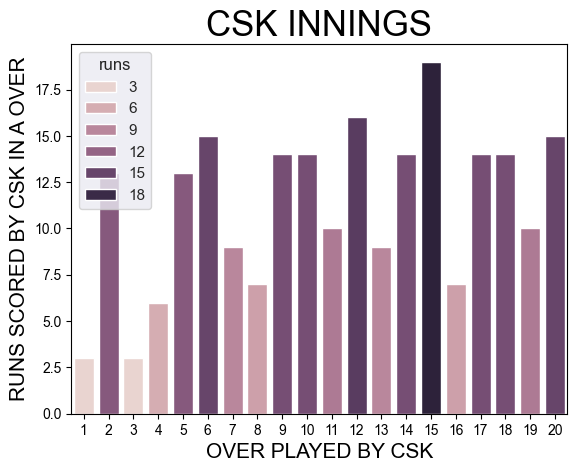

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("CSK INNINGS", fontsize=25, color="black")
plt.xlabel("OVER PLAYED BY CSK", fontsize=15)
plt.ylabel("RUNS SCORED BY CSK IN A OVER", fontsize=15)
color_palette = "pastel"
colors = ["#fdb913"] # ,"#2B5DA8","#32A6DE" "#E9530D"
sns.set_palette(sns.color_palette(colors))
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x=df_csk_grouped["over"], y=df_csk_grouped["runs"],  hue=df_csk_grouped["runs"]) # palette=color_palette,
plt.show()

In [18]:
batting_df[(batting_df["season"]==2011)]#.head(2)

,match_id,season,home_team,away_team,current_innings,innings_id,over,ball,runs
184199,501198,2011,CSK,KKR,CSK,1,1,1,0
184200,501198,2011,CSK,KKR,CSK,1,1,2,1
184201,501198,2011,CSK,KKR,CSK,1,1,3,0
184202,501198,2011,CSK,KKR,CSK,1,1,4,0
184203,501198,2011,CSK,KKR,CSK,1,1,5,4
...,...,...,...,...,...,...,...,...,...
201158,501271,2011,CSK,RCB,RCB,2,20,2,6
201159,501271,2011,CSK,RCB,RCB,2,20,3,0
201160,501271,2011,CSK,RCB,RCB,2,20,4,1
201161,501271,2011,CSK,RCB,RCB,2,20,5,1


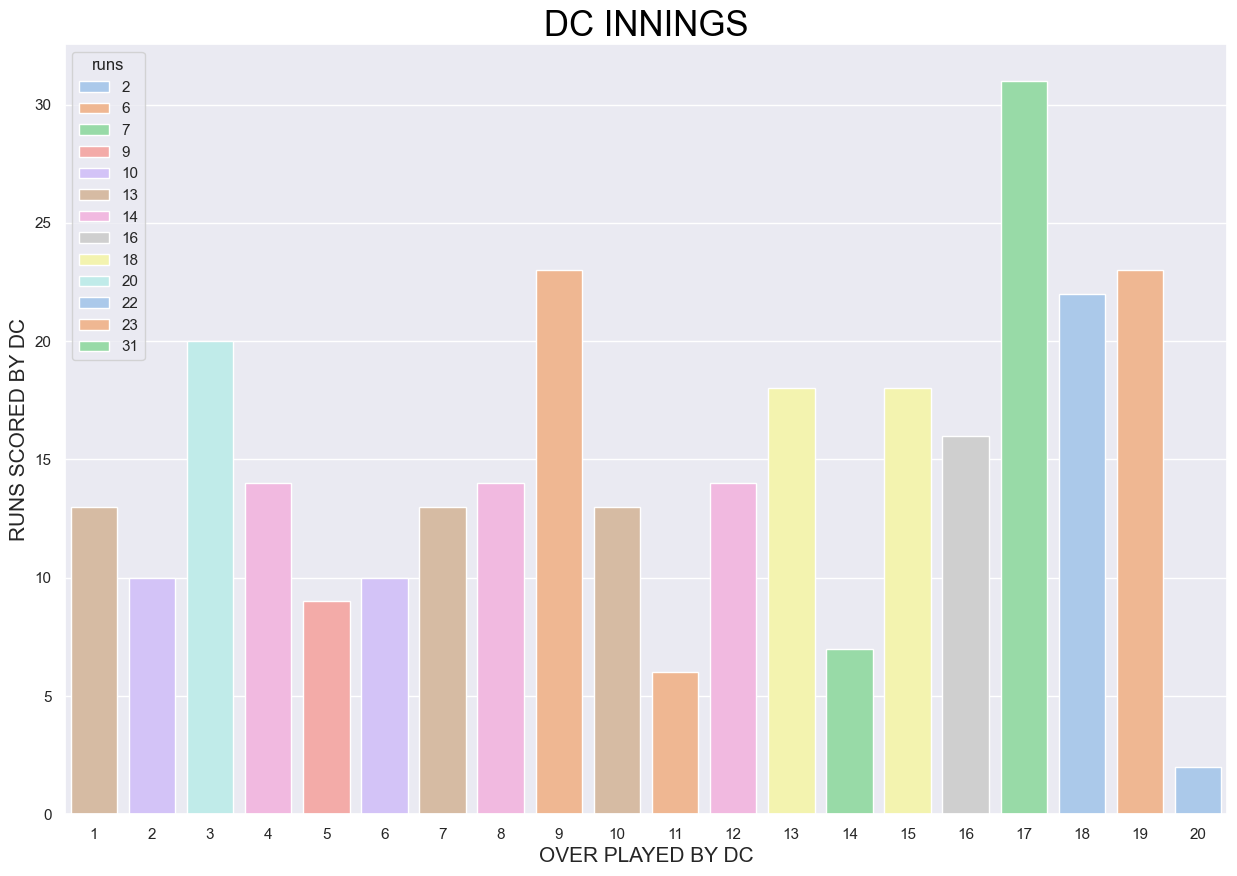

In [20]:
def plot_runsperover(season,home_team, away_team,current_innings):
    runs_season = batting_df[(batting_df["season"]==season)& (batting_df["home_team"]==home_team) & (batting_df["away_team"]==away_team)]
    
    runs_perover = runs_season.groupby(["over"]).sum().reset_index()
    # print(runs_perover)
    runs_perover["home_team"] = home_team
    runs_perover["away_team"] = away_team
    runs_perover["current_innings"] = current_innings
    runs_perover["season"] = season
    
    title = f"{current_innings} INNINGS"
    over_label = f"OVER PLAYED BY {current_innings}"
    run_label = f"RUNS SCORED BY {current_innings}"
    
    plt.title(title, fontsize=25, color="black")
    plt.xlabel(over_label, fontsize=15)
    plt.ylabel(run_label, fontsize=15)
    color_palette = "pastel"
    sns.set(rc={"figure.figsize":(15,10)})
    sns.barplot(x=runs_perover["over"], y=runs_perover["runs"], palette=color_palette, hue=runs_perover["runs"])
    plt.show()
   

plot_runsperover(2022, "DC","KKR","DC")

plt.title("CSK INNINGS", fontsize=25, color="black")
plt.xlabel("OVER PLAYED BY CSK", fontsize=15)
plt.ylabel("RUNS SCORED BY CSK IN A OVER", fontsize=15)
color_palette = "pastel"
colors = ["#B0FF92"] # ,"#2B5DA8","#32A6DE" "#E9530D"
sns.set_palette(sns.color_palette(colors))
sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x=df_csk_grouped["over"], y=df_csk_grouped["runs"],  hue=df_csk_grouped["runs"]) # palette=color_palette,
plt.show()